In [48]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import mysql.connector

# Establish a connection to the MySQL database
connection = mysql.connector.connect(
    host='127.0.0.1',
    port=13306,
    user='root',
    password='root',
    database='pyml'
)

# Read the table data using pandas
query = "SELECT title, content, date FROM crawl_data where domain = 'https://vneconomy.vn/kinh-te-the-gioi.htm'"
df = pd.read_sql(query, connection)


/var/folders/g6/37kt02914kx36yzcbbqfyck00000gn/T/ipykernel_6132/2801794870.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [49]:
df.head()

,title,content,date
0,10 xe điện có tầm đi dài nhất năm 2023,\nNỗi quan ngại về tầm đi (range - quãng đường...,2023-06-08 10:57:00
1,Cử nhân thất nghiệp: “Vết sẹo” kinh tế Trung Quốc,\nNhiều người trong số họ chấp nhận công việc ...,2023-06-09 07:11:00
2,Giá vàng thế giới tăng mạnh nhờ đồng USD giảm ...,\nGiá vàng thế giới tăng mạnh trong phiên giao...,2023-06-09 10:31:00
3,20 thành phố đắt đỏ nhất thế giới với người nư...,\nTheo Xếp hạng Chi phí Sinh hoạt năm 2023 của...,2023-06-08 10:22:00
4,"S&P 500 đóng cửa cao nhất từ đầu năm, dầu sụt ...",\nChứng khoán Mỹ tăng điểm trong phiên giao dị...,2023-06-09 07:56:00


In [50]:
dfIndex = pd.read_csv('./data/vn_index.csv')
print(dfIndex.head())

# how to format date from '2023-06-08 10:57:00' to '09/06/2023' ?
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%d/%m/%Y')
print(df.head())

         Ngày  Lần cuối        Mở       Cao      Thấp       KL % Thay đổi
0  09/06/2023  1,107.53  1,101.32  1,107.53  1,097.23  902.21K      0.56%
1  08/06/2023  1,101.32  1,109.54  1,115.14  1,101.32    1.32M     -0.74%
2  07/06/2023  1,109.54  1,108.31  1,112.28  1,104.26    1.00M      0.11%
3  06/06/2023  1,108.31  1,097.82  1,108.31  1,097.82  842.76K      0.96%
4  05/06/2023  1,097.82  1,090.84  1,103.81  1,090.84  948.36K      0.64%
                                               title  \
0             10 xe điện có tầm đi dài nhất năm 2023   
1  Cử nhân thất nghiệp: “Vết sẹo” kinh tế Trung Quốc   
2  Giá vàng thế giới tăng mạnh nhờ đồng USD giảm ...   
3  20 thành phố đắt đỏ nhất thế giới với người nư...   
4  S&P 500 đóng cửa cao nhất từ đầu năm, dầu sụt ...   

                                             content        date  
0  \nNỗi quan ngại về tầm đi (range - quãng đường...  08/06/2023  
1  \nNhiều người trong số họ chấp nhận công việc ...  09/06/2023  
2  \nGiá vàng thế 

In [51]:
# how to merge df and dfIndex by date and another column ?

dfMerge = pd.merge(df, dfIndex, left_on=['date'], right_on=['Ngày'], how='left')
print(dfMerge.head())

                                               title  \
0             10 xe điện có tầm đi dài nhất năm 2023   
1  Cử nhân thất nghiệp: “Vết sẹo” kinh tế Trung Quốc   
2  Giá vàng thế giới tăng mạnh nhờ đồng USD giảm ...   
3  20 thành phố đắt đỏ nhất thế giới với người nư...   
4  S&P 500 đóng cửa cao nhất từ đầu năm, dầu sụt ...   

                                             content        date        Ngày  \
0  \nNỗi quan ngại về tầm đi (range - quãng đường...  08/06/2023  08/06/2023   
1  \nNhiều người trong số họ chấp nhận công việc ...  09/06/2023  09/06/2023   
2  \nGiá vàng thế giới tăng mạnh trong phiên giao...  09/06/2023  09/06/2023   
3  \nTheo Xếp hạng Chi phí Sinh hoạt năm 2023 của...  08/06/2023  08/06/2023   
4  \nChứng khoán Mỹ tăng điểm trong phiên giao dị...  09/06/2023  09/06/2023   

   Lần cuối        Mở       Cao      Thấp       KL % Thay đổi  
0  1,101.32  1,109.54  1,115.14  1,101.32    1.32M     -0.74%  
1  1,107.53  1,101.32  1,107.53  1,097.23  902.21K    

In [52]:
df_sorted = dfMerge.sort_values(by='date', ascending=True)
print(df_sorted.head())

                                                 title  \
741  Tiền ảo 2023: Không chỉ là “mùa đông”, thậm ch...   
627  Giá vàng trong nước tiếp tục trượt dốc, thế gi...   
629  Các nhà đầu tư lớn “rón rén” quay trở lại thị ...   
630  Thế khó của Chủ tịch Fed trong cuộc họp báo ng...   
631  Đặt cược sai vào cổ phiếu ô tô điện, Amazon hứ...   

                                               content        date  \
741  \nTrong thế giới tiền ảo, các nhà đầu tư đã qu...  01/01/2023   
627  \nGiá vàng miếng trong nước sáng nay (1/2) tiế...  01/02/2023   
629  \nHãng tin Reuters dẫn số liệu từ công ty quản...  01/02/2023   
630  \nCuộc họp chính sách tiền tệ đầu tiên trong n...  01/02/2023   
631  \nTrong 9 tháng đầu năm 2022, Amazon ghi nhận ...  01/02/2023   

           Ngày  Lần cuối        Mở       Cao      Thấp     KL % Thay đổi  
741         NaN       NaN       NaN       NaN       NaN    NaN        NaN  
627  01/02/2023  1,075.97  1,111.18  1,116.96  1,075.97  1.03M     -3.17%  
62

741    -0.000291
627    -0.031700
629    -0.031700
630    -0.031700
631    -0.031700
637    -0.031700
620    -0.031700
626    -0.031700
621    -0.031700
628    -0.031700
490     0.015500
494     0.015500
489     0.015500
330    -0.000291
329    -0.000291
331    -0.000291
197    -0.000291
201    -0.000291
35      0.003000
41      0.003000
40      0.003000
38      0.003000
39      0.003000
36      0.003000
37      0.003000
1378   -0.000291
1377   -0.000291
1376   -0.000291
1374   -0.000291
1368   -0.000291
1370   -0.000291
1369   -0.000291
1372   -0.000291
1194   -0.000291
1198   -0.000291
1203   -0.000291
1032    0.005700
1033    0.005700
1034    0.005700
1035    0.005700
1037    0.005700
1038    0.005700
1042    0.005700
1036    0.005700
865    -0.011600
864    -0.011600
866    -0.011600
863    -0.011600
868    -0.011600
869    -0.011600
Name: change_percent, dtype: float64


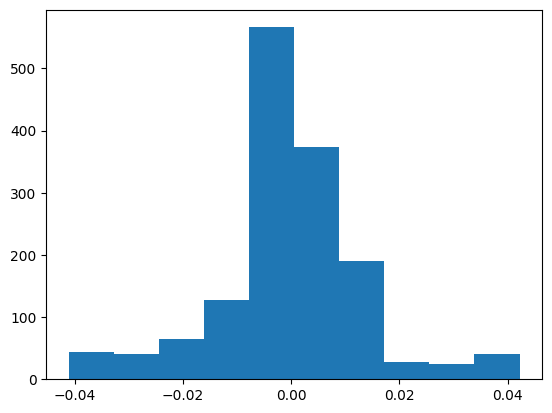

In [59]:
from sklearn.impute import SimpleImputer
import math
import numpy as np
# Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Extract the column with missing values from the DataFrame
def convertToFloat(percentage_str):
    if type(percentage_str) == str:
        percentage_str = percentage_str.strip('%')
        # Convert to decimal.
        decimal_value = float(percentage_str) / 100
        return decimal_value
    else:
        return percentage_str

columnDiffValue = df_sorted['% Thay đổi'].apply(convertToFloat)

# Reshape the column to match the input requirements of SimpleImputer
column_reshaped = columnDiffValue.values.reshape(-1, 1)

# Fit the imputer on the column
imputer.fit(column_reshaped)

# Transform the column by filling missing values
column_filled = imputer.transform(column_reshaped)

# Replace the original column with the imputed values
df_sorted['change_percent'] = column_filled
print(df_sorted['change_percent'][:50])

import matplotlib.pyplot as plt

# Create a histogram of the column
plt.hist(df_sorted["change_percent"])

# Show the histogram
plt.show()


In [57]:
df_sorted['content'] = df_sorted['content'].str[:60]
df_sorted.to_csv('./data/vn_index_merge_content.csv', index=False)


In [55]:
import numpy as np
import torch
from transformers import AutoModel, AutoTokenizer

phobert = AutoModel.from_pretrained("vinai/phobert-base-v2")
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2")

Some weights of the model checkpoint at vinai/phobert-base-v2 were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at vinai/phobert-base-v2 and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Special tokens

In [56]:
import pandas as pd
from datetime import date, timedelta
import re
from underthesea import word_tokenize, sent_tokenize
from gensim import corpora, models
import torch

def clean_text(text):
    text = str(text).lower() # lowercase text
    return text

documents = df['content'].values.tolist()
print('documents:', documents[0:1])
print('len:', len(documents))

def trim_tensor(tensor, max_length):
    if tensor.size(1) > max_length:
        tensor = tensor[:, :max_length]  # Trim the tensor to the max_length
    return tensor

from torch.nn.functional import pad
def trim_words(sentence, num_word = 200):
    # Split the sentence into words
    words = sentence.split()
    # Trim the sentence to 5 words
    trimmed_sentence = " ".join(words[:num_word])
    return trimmed_sentence

max_len = 400
def vectorize(sentence):
    sentence_token = trim_words(word_tokenize(sentence, format="text"))
    input_ids = torch.tensor([tokenizer.encode(sentence_token)])
    input_ids = trim_tensor(input_ids, 256)
    features = phobert(input_ids)  # Models outputs are now tuples
    features_np = features.last_hidden_state.detach()
    padding_length = max_len - len(features_np[0])
    padded_a = pad(features_np, (0, 0, 0, padding_length), value=0, mode='constant')
    return padded_a.detach().numpy()[0]

def vectorize_arr(sentences):
    t = np.array([vectorize(sentence) for sentence in sentences])
    return t

text = """
Chứng khoán Mỹ khởi sắc vào ngày thứ Ba (14/3), khi nhà đầu tư đặt cược vào việc nguy cơ lan truyền sau vụ phá sản của các ngân hàng Silicon Valley và Signature đã được ngăn chặn.
Kết thúc phiên giao dịch ngày thứ Ba, chỉ số Dow Jones tăng 336.26 điểm (tương đương 1.06%) lên 32,155.40 điểm, chấm dứt chuỗi 5 phiên lao dốc liên tiếp. Chỉ số S&P 500 tiến 1.65% lên 3,919.29 điểm. Chỉ số Nasdaq Composite cộng 2.14% lên 11,428.15 điểm.
Sự nhiệt tình mua vào các cổ phiếu ngân hàng của nhà đầu tư đã giảm đi phần nào vào buổi chiều. Tuy nhiên, nhiều cổ phiếu vẫn ghi nhận đà tăng, đánh dấu bước đảo chiều sau 2 phiên giảm sâu khi nhà đầu tư ngày càng tin tưởng rằng những ngân hàng đó sẽ không chịu chung số phận như ngân hàng Silicon Valley và Signature. Các nhà quản lý cho biết vào ngày 12/3 rằng họ đã xây dựng một kế hoạch để can thiệp cho tất cả những người gửi tiền ở 2 ngân hàng này.
Chứng chỉ quỹ SPDR S&P Regional Banking ETF tiến 2%, phục hồi phần nào sau đà lao dốc 12% trong phiên trước đó. Cổ phiếu First Republic Bank bứt phá gần 27% sau khi bốc hơi gần 62% vào ngày 13/3. Cổ phiếu KeyCorp vọt gần 7% trong đợt phục hồi nhẹ sau khi trượt dốc 27%.
"""

# (1, 239, 768)
print('documents:', vectorize(text).shape)
X_train = vectorize_arr(documents)

documents: ['\nNỗi quan ngại về tầm đi (range - quãng đường đi được mỗi lần sạc đầy pin) là một trong những lý do lớn nhất khiến người dùng băn khoăn khi chuyển sang sử dụng xe điện.\xa0\nNăm 2021, tầm đi\xa0 bình quân của xe điện tại Mỹ chỉ là 349 km, thấp hơn đáng kể so với mức bình quân của xe chạy xăng là 665 km. Tuy nhiên, theo biểu đồ dưới đây, tầm đi của xe điện đã tăng lên đáng kể với mức 480 km mỗi lần sạc đầy ngày càng phổ biến\nDưới đây là top 10 xe điện có quãng đường di chuyển dài nhất mỗi lần sạc đầy năm 2023 tại thị trường Mỹ.\xa0\n\n\n\n']
len: 1498
documents: (400, 768)


KeyboardInterrupt: 

In [ ]:
Y_train_pure = df_sorted['change_percent'].values.tolist()
Y_train = np.expand_dims(Y_train_pure, axis = 1)
print(Y_train[:20])

[[-0.000291]
 [-0.0317  ]
 [-0.0317  ]
 [-0.0317  ]
 [-0.0317  ]
 [-0.0317  ]
 [-0.0317  ]
 [-0.0317  ]
 [-0.0317  ]
 [-0.0317  ]
 [ 0.0155  ]
 [ 0.0155  ]
 [ 0.0155  ]
 [-0.000291]
 [-0.000291]
 [-0.000291]
 [-0.000291]
 [-0.000291]
 [ 0.003   ]
 [ 0.003   ]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, BatchNormalization, Dense, LSTM, Bidirectional, GlobalAveragePooling1D, Input, Average, LayerNormalization

input_shape = (400, 768)
model = Sequential()
model.add(Input(shape=input_shape))
model.add(Bidirectional(LSTM(
        100, 
        return_sequences = True, 
        recurrent_dropout=0.2)))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(BatchNormalization())
model.add(GlobalAveragePooling1D())

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 400, 200)         695200    
 nal)                                                            
                                                                 
 layer_normalization_1 (Laye  (None, 400, 200)         400       
 rNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 400, 2)            402       
                                                                 
 global_average_pooling1d_1   (None, 2)                0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                      

In [ ]:

model.fit(X_train, Y_train, epochs=15, batch_size=10)

Epoch 1/15
150/150 [==============================] - 127s 830ms/step - loss: 5.5724e-04 - mae: 0.0107
Epoch 2/15
150/150 [==============================] - 248s 2s/step - loss: 1.7588e-04 - mae: 0.0088
Epoch 3/15
150/150 [==============================] - 311s 2s/step - loss: 1.7576e-04 - mae: 0.0089
Epoch 4/15
150/150 [==============================] - 272s 2s/step - loss: 1.7645e-04 - mae: 0.0089
Epoch 5/15
150/150 [==============================] - 273s 2s/step - loss: 1.7680e-04 - mae: 0.0089
Epoch 6/15
150/150 [==============================] - 239s 2s/step - loss: 1.7621e-04 - mae: 0.0090
Epoch 7/15
150/150 [==============================] - 240s 2s/step - loss: 1.7557e-04 - mae: 0.0089
Epoch 8/15
150/150 [==============================] - 253s 2s/step - loss: 1.7706e-04 - mae: 0.0089
Epoch 9/15
150/150 [==============================] - 264s 2s/step - loss: 1.7823e-04 - mae: 0.0090
Epoch 10/15
150/150 [==============================] - 274s 2s/step - loss: 1.7722e-04 - mae: 0.0

In [ ]:
model.save('./model/stock_predict.h5')

In [ ]:
test_data = [
    "Theo hãng tin Bloomberg, nhà sản xuất ở Trung Quốc - từ các công ty chuyên về đồ trang trí Giáng sinh cho tới các hãng quần áo và lều bạt - đều cho biết lượng đơn hàng mà họ nhận được từ khách hàng nước ngoài đang ngày càng giảm.",
    "Giá vàng thế giới sụt mạnh về gần mốc chủ chốt 1.700 USD/oz, hoàn tất chuỗi tháng giảm dài nhất kể từ năm 2018 dưới sức ép từ chiến dịch tăng lãi suất của các ngân hàng trung ương trên toàn cầu. Giá vàng miếng trong nước sáng nay (1/9) không giảm, dẫn tới chênh lệch giá vàng trong nước-thế giới tăng lên 18 triệu đồng/lượng.",
    "Cách đây chưa lâu, các cổ phiếu công nghệ vốn hoá lớn - đặc biệt là nhóm FAANG (gồm Facebook, Apple, Amazon, Netflix và Goolge) - được giới đầu tư ở Phố Wall xem là “những ngôi sao sáng”",
    "Nord Stream 1, đường ống dẫn khí đốt lớn nhất từ Nga tới châu Âu, sẽ không thể hoạt động trở lại chừng nào Siemens Energy còn chưa sửa xong thiết bị hỏng. Đó là tuyên bố được Phó tổng giám đốc của hãng khí đốt quốc doanh Nga Gazprom, ông Vitaly Markelov, đưa ra trong cuộc trả lời phỏng vấn độc quyền hãng tin Reuters vào ngày 6/9."
]

test_data_c = vectorize_arr(test_data)
print('test_data_c:', test_data_c.shape)
result = model.predict(test_data_c)
print('result:\n', result)

len sentence_token: 43
trim_tensor 45
trim_tensor after trim torch.Size([1, 45])
len input_ids: torch.Size([1, 45])
len sentence_token: 66
trim_tensor 70
trim_tensor after trim torch.Size([1, 70])
len input_ids: torch.Size([1, 70])
len sentence_token: 41
trim_tensor 47
trim_tensor after trim torch.Size([1, 47])
len input_ids: torch.Size([1, 47])
len sentence_token: 57
trim_tensor 68
trim_tensor after trim torch.Size([1, 68])
len input_ids: torch.Size([1, 68])
test_data_c: (4, 400, 768)
1/1 [==============================] - 0s 111ms/step
result:
 [[0.00038971]
 [0.00038971]
 [0.00038971]
 [0.00038971]]
